# Task 2
To find top m matches from cards in the train-001 to cards saved from task 1

##### Importing necessary modules

In [1]:
import pandas as pd
from matplotlib import pyplot as plt
import cv2

# Reading the pickle file
Use README.md file if you use version below python 3.8 

In [2]:
results_dir = 'iva_files/results/'
data_dir = 'iva_files/DATA/'
card_file = results_dir + 'train_card_seperated.pkl'
cards_df = pd.read_pickle(card_file)
cards_df.head()

,ID,Cards
0,67,"[[[255, 255, 255], [255, 255, 255], [255, 255,..."
1,52,"[[[255, 255, 255], [255, 255, 255], [255, 255,..."
2,5,"[[[255, 255, 255], [255, 255, 255], [255, 255,..."
3,35,"[[[255, 255, 255], [255, 255, 255], [255, 255,..."
4,40,"[[[255, 255, 255], [255, 255, 255], [255, 255,..."


##### Getting train-001 card images
Same slicing technique is used in task 1

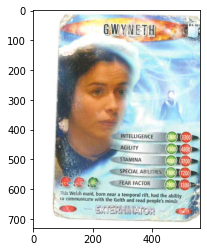

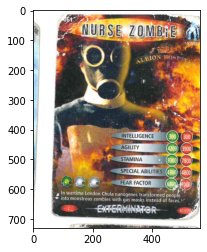

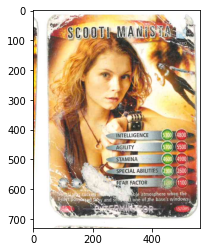

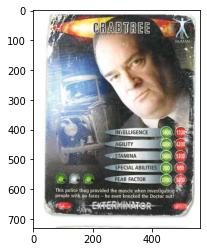

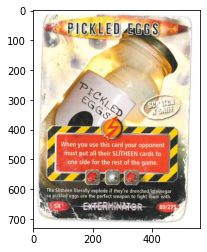

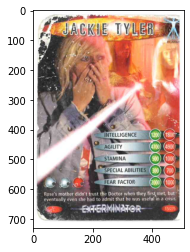

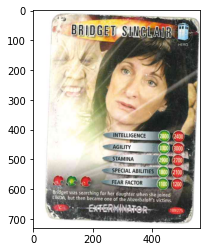

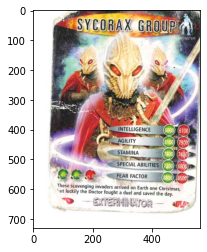

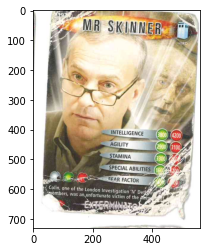

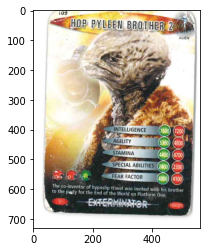

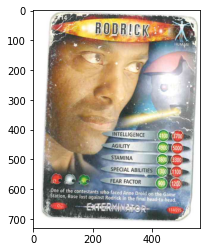

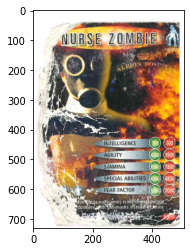

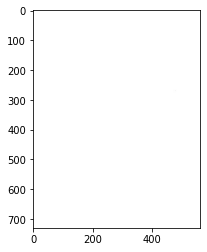

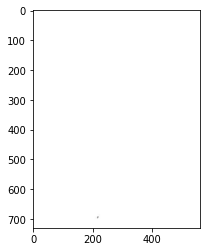

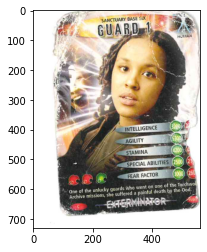

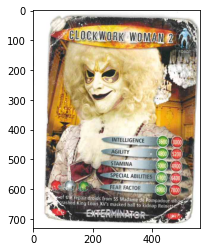

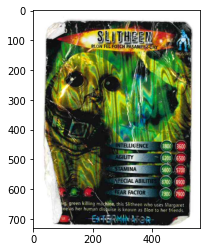

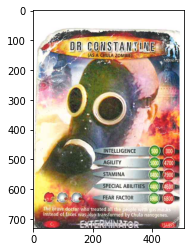

In [3]:
train1_images = []
train1_path = data_dir + 'train-001.jpg' # Path to train-001
file = plt.imread(train1_path)
h_add = 560
v_add = 730
v_start = 0
for rows in range(3):
    h_start = 0
    for col in range(6):
        img = file[v_start:(v_start + v_add), h_start:(h_start + h_add)]
        plt.imshow(img)
        plt.show()
        val = int(input()) # Input any integer if it is a valid card or -1 if it is a empty space
        if(val != -1): 
            train1_images.append(img) # Note that we donot save the ID 
        h_start = h_start + h_add
    v_start = v_start + v_add

##### SIFT Feature Detection Model

In [4]:
def sift_features_match(img1, img2):
    '''
    SIFT model. 
    img1 -> train1 image
    img2 -> Task 1 extracted image
    Returns: Similarity Score
    '''
    # Converted to Gray scale
    gray1 = cv2.cvtColor(img1, cv2.COLOR_BGR2GRAY)
    gray2 = cv2.cvtColor(img2, cv2.COLOR_BGR2GRAY)

    # Using OpenCV API to get the object for SIFT feature model
    sift = cv2.xfeatures2d.SIFT_create()

    # Getting keypoints and descriptors of each image
    _, descriptors_1 = sift.detectAndCompute(gray1,None)
    _, descriptors_2 = sift.detectAndCompute(gray2,None)

    # Brute force matching object
    bf = cv2.BFMatcher(cv2.NORM_L1, crossCheck=True)

    # Find the macthes of descriptors
    matches = bf.match(descriptors_1,descriptors_2)
    matches = sorted(matches, key = lambda x:x.distance)

    # Return length as similarity score
    return len(matches)

##### Removing duplicates to avoid matching redundantly. 

In [5]:
cards_df.drop_duplicates(subset=['ID'], inplace=True)
print(len(cards_df)) # Size of the frame after removing duplicates

104


##### Function to display top m matches

In [6]:
def top_m_matches(train_images, train_pos, match_df, m):
    '''
    Function to get top m matches and display the ID and card image
    train_images -> The list of all cards in train-001
    train_pos -> the positing of the card in the train-001
    match_df -> The built dataframe after applying model on all images.
    m -> top m matches.
    '''
    plt.imshow(train_images[train_pos]) # imshowing the image in that position
    plt.show()
    
    #Sorting the dataframe in descending order.
    temp = match_df.sort_values(by=[str('train_'+str(train_pos))], ascending=False, inplace=False) 
    plt.figure(figsize=(25,25)) 

    # Get top m match
    for i in range(m):
        im = temp.iloc[i]['Cards']
        plt.subplot(1,m,i+1)
        plt.axis('off')
        plt.title('Card ID - '+str(temp.iloc[i]['ID'])+'/score - '+str(temp.iloc[i][str('train_'+str(train_pos))]))
        plt.imshow(im)
    plt.show()

### !!! Warning !!!
Now we use the SIFT model to find similarity score of all train-001 cards to all other cards

In [7]:
for i in range(len(train1_images)): # Going through cards in train-001
    name = 'train_'+str(i)
    similarity = [] # list to store similarity score
    print('=========================================')
    print('Finding Similarity for train -', i)
    for j in range(len(cards_df)):
        print('Comparing with card - ',j)
        img1 = train1_images[i]
        img2 = cards_df.iloc[j]['Cards']
        similarity.append(sift_features_match(img1, img2)) # Append the smiliarity score from the model.
    cards_df[name] = similarity # Appending the list of similarity score for each train-001 card.
    print('=========================================')

Finding Similarity for train - 0
Comparing with card -  0
Comparing with card -  1
Comparing with card -  2
Comparing with card -  3
Comparing with card -  4
Comparing with card -  5
Comparing with card -  6
Comparing with card -  7
Comparing with card -  8
Comparing with card -  9
Comparing with card -  10
Comparing with card -  11
Comparing with card -  12
Comparing with card -  13
Comparing with card -  14
Comparing with card -  15
Comparing with card -  16
Comparing with card -  17
Comparing with card -  18
Comparing with card -  19
Comparing with card -  20
Comparing with card -  21
Comparing with card -  22
Comparing with card -  23
Comparing with card -  24
Comparing with card -  25
Comparing with card -  26
Comparing with card -  27
Comparing with card -  28
Comparing with card -  29
Comparing with card -  30
Comparing with card -  31
Comparing with card -  32
Comparing with card -  33
Comparing with card -  34
Comparing with card -  35
Comparing with card -  36
Comparing with 

##### Saving the result in pickle file

In [8]:
result_file_name = results_dir + 'task2_results.pkl'
cards_df.to_pickle(result_file_name)
load_result_flag = True

##### Printing top M matches

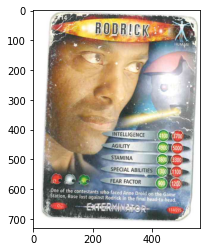

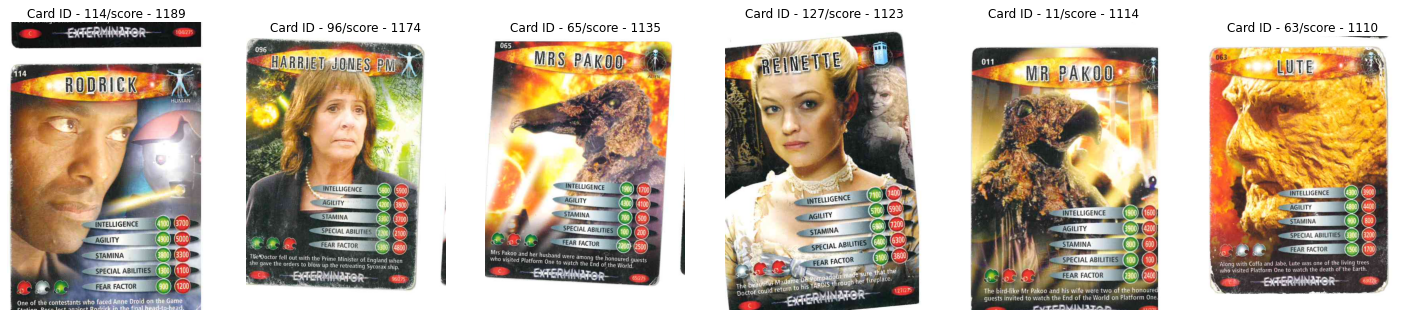

In [9]:
train_pos = 10
m = 6
top_m_matches(train1_images, train_pos, cards_df, m)

##### Example cell to test the result

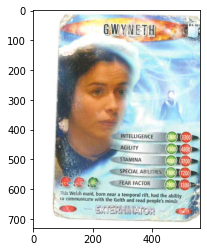

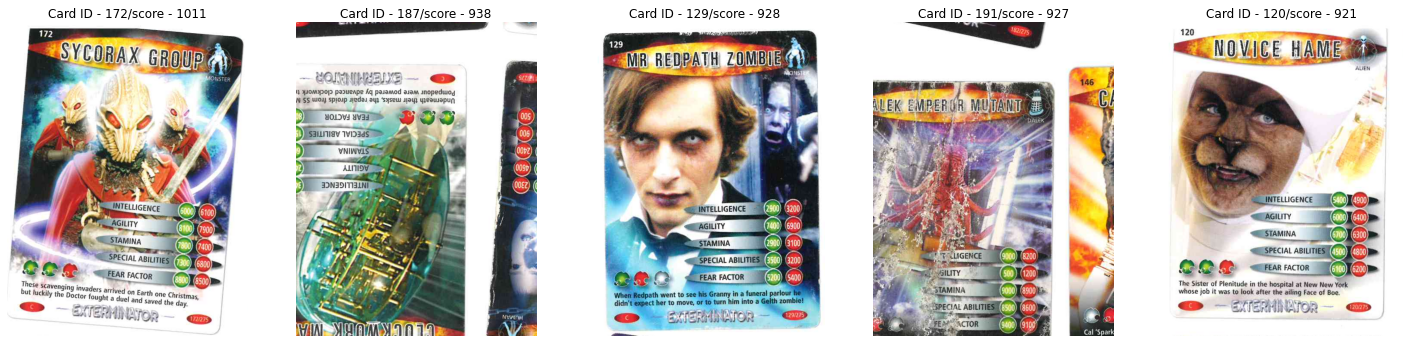

In [15]:
task2_result_file = results_dir + 'task2_results.pkl'
task2_result = pd.read_pickle(task2_result_file)
train_pos = 0
m = 5
top_m_matches(train1_images, train_pos, task2_result, m)